In [10]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from craftroom import resample
# import stistools
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting
from scipy.io.idl import readsav
from astropy.convolution import convolve_fft
from astropy.convolution import Gaussian1DKernel
from matplotlib.gridspec import GridSpec
from astropy.units import cds
cds.enable()
import math as mt

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


How to make the 1A version. Scipi or craftroom? How to make the instruments combine at the ends.

In [2]:
data = fits.getdata('/media/david/1tb_storage1/emergency_data/mega_muscles/v01_seds/hlsp_muscles_multi_multi_gj15a_broadband_v1_var-res-sed.fits',1)
# data= Table.read('test_to_fits/t1_table_test.ecsv')
data = Table(data, meta=fits.getheader('/media/david/1tb_storage1/emergency_data/mega_muscles/v01_seds/hlsp_muscles_multi_multi_gj15a_broadband_v1_var-res-sed.fits'))

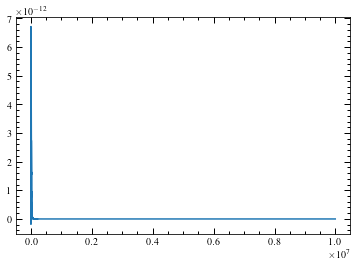

In [3]:
plt.plot(data['WAVELENGTH'],data['FLUX'])

In [4]:
#craftroom or scipy

In [5]:
w, f, e = data['WAVELENGTH'],data['FLUX'],data['ERROR']

In [6]:
from craftroom import resample

In [8]:
print(w[0],w[-1])

7.43413401 9995000.0


In [9]:
start, end= mt.ceil(w[0]), mt.floor(w[-1])
end = 1e5
print(start,end)

8 100000.0


In [10]:
neww = np.arange(start,end+1, 1)

In [11]:
f1 = interpolate.interp1d(w, f, fill_value='extrapolate',)(neww)
w2, f2 = resample.bintogrid(w, f, newx=neww)

[8.0000e+00 9.0000e+00 1.0000e+01 ... 9.9998e+04 9.9999e+04 1.0000e+05]


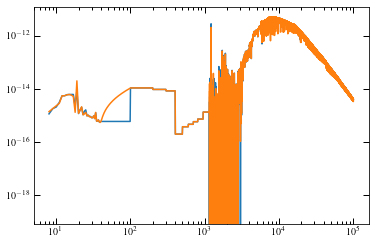

In [12]:
print(neww)
plt.plot(w2, f2)
plt.plot(neww, f1)
plt.xscale('log')
plt.yscale('log')

In [13]:
og = np.trapz(f,w)
sp = np.trapz(f1, neww)
cr =np.trapz(f2,w2)
print(og, sp,cr)
print(og/sp)
print(og/cr)

5.6072088937185584e-08 5.59358940905702e-08 5.5937035578527885e-08
1.0024348381094055
1.0024143817644413


In [14]:
data.dtype.names

('WAVELENGTH',
 'WAVELENGTH0',
 'WAVELENGTH1',
 'FLUX',
 'ERROR',
 'EXPTIME',
 'DQ',
 'EXPSTART',
 'EXPEND',
 'INSTRUMENT',
 'NORMFAC',
 'BOLOFLUX',
 'BOLOERR')

In [15]:
data['INSTRUMENT']

8192
8192
8192
8192
8192
8192
8192
8192
8192
32768
32768


In [16]:
i2 = interpolate.interp1d(w, data['INSTRUMENT'], kind = 'previous')(w2)

In [17]:
[print (wi, ii) for wi, ii in zip(w[100:200], data['INSTRUMENT'][100:200])]

151.5 16384
152.5 16384
153.5 16384
154.5 16384
155.5 16384
156.5 16384
157.5 16384
158.5 16384
159.5 16384
160.5 16384
161.5 16384
162.5 16384
163.5 16384
164.5 16384
165.5 16384
166.5 16384
167.5 16384
168.5 16384
169.5 16384
170.5 16384
171.5 16384
172.5 16384
173.5 16384
174.5 16384
175.5 16384
176.5 16384
177.5 16384
178.5 16384
179.5 16384
180.5 16384
181.5 16384
182.5 16384
183.5 16384
184.5 16384
185.5 16384
186.5 16384
187.5 16384
188.5 16384
189.5 16384
190.5 16384
191.5 16384
192.5 16384
193.5 16384
194.5 16384
195.5 16384
196.5 16384
197.5 16384
198.5 16384
199.5 16384
200.5 16384
201.5 16384
202.5 16384
203.5 16384
204.5 16384
205.5 16384
206.5 16384
207.5 16384
208.5 16384
209.5 16384
210.5 16384
211.5 16384
212.5 16384
213.5 16384
214.5 16384
215.5 16384
216.5 16384
217.5 16384
218.5 16384
219.5 16384
220.5 16384
221.5 16384
222.5 16384
223.5 16384
224.5 16384
225.5 16384
226.5 16384
227.5 16384
228.5 16384
229.5 16384
230.5 16384
231.5 16384
232.5 16384
233.5 16384
234.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [18]:
[print (wi, ii) for wi, ii in zip(w2[:50], i2[:50])]

8.0 8192.0
9.0 8192.0
10.0 8192.0
11.0 8192.0
12.0 8192.0
13.0 8192.0
14.0 8192.0
15.0 8192.0
16.0 8192.0
17.0 8192.0
18.0 32768.0
19.0 32768.0
20.0 32768.0
21.0 32768.0
22.0 32768.0
23.0 32768.0
24.0 32768.0
25.0 32768.0
26.0 32768.0
27.0 32768.0
28.0 32768.0
29.0 32768.0
30.0 32768.0
31.0 32768.0
32.0 32768.0
33.0 32768.0
34.0 32768.0
35.0 32768.0
36.0 32768.0
37.0 32768.0
38.0 32768.0
39.0 32768.0
40.0 32768.0
41.0 32768.0
42.0 32768.0
43.0 32768.0
44.0 32768.0
45.0 32768.0
46.0 32768.0
47.0 32768.0
48.0 32768.0
49.0 32768.0
50.0 32768.0
51.0 32768.0
52.0 32768.0
53.0 32768.0
54.0 32768.0
55.0 32768.0
56.0 32768.0
57.0 32768.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [19]:
for i in range(len(i2)-1):
    if i2[i] != i2[i+1]:
        i2[i] = i2[i] + i2[i+1]

In [20]:
[print (wi, ii) for wi, ii in zip(w2[100:200], i2[100:200])]

108.0 16384.0
109.0 16384.0
110.0 16384.0
111.0 16384.0
112.0 16384.0
113.0 16384.0
114.0 16384.0
115.0 16384.0
116.0 16384.0
117.0 16384.0
118.0 16384.0
119.0 16384.0
120.0 16384.0
121.0 16384.0
122.0 16384.0
123.0 16384.0
124.0 16384.0
125.0 16384.0
126.0 16384.0
127.0 16384.0
128.0 16384.0
129.0 16384.0
130.0 16384.0
131.0 16384.0
132.0 16384.0
133.0 16384.0
134.0 16384.0
135.0 16384.0
136.0 16384.0
137.0 16384.0
138.0 16384.0
139.0 16384.0
140.0 16384.0
141.0 16384.0
142.0 16384.0
143.0 16384.0
144.0 16384.0
145.0 16384.0
146.0 16384.0
147.0 16384.0
148.0 16384.0
149.0 16384.0
150.0 16384.0
151.0 16384.0
152.0 16384.0
153.0 16384.0
154.0 16384.0
155.0 16384.0
156.0 16384.0
157.0 16384.0
158.0 16384.0
159.0 16384.0
160.0 16384.0
161.0 16384.0
162.0 16384.0
163.0 16384.0
164.0 16384.0
165.0 16384.0
166.0 16384.0
167.0 16384.0
168.0 16384.0
169.0 16384.0
170.0 16384.0
171.0 16384.0
172.0 16384.0
173.0 16384.0
174.0 16384.0
175.0 16384.0
176.0 16384.0
177.0 16384.0
178.0 16384.0
179.0 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [21]:
a = [200, 200, 200, 150]
b = [1, 2, 3,4]
c = [1.2, 2.4, 3.6]
d = interpolate.interp1d(b, a, fill_value='extrapolate')(c)
print(d)

[200. 200. 170.]


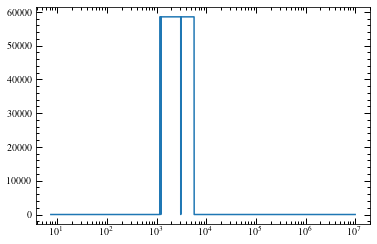

In [22]:
plt.plot(data['WAVELENGTH'], data['EXPSTART'])
plt.xscale('log')

In [23]:
x1 = np.arange(1, 11, 0.1)
x2 = np.arange(1, 11, 1)
y1 = np.hstack((np.full(10, 30), np.full(60, 25), np.full(30, 15)))
up = interpolate.interp1d(x1, y1, kind='next')(x2)
down = interpolate.interp1d(x1, y1, kind='previous')(x2)
print(up)
print(down)
print(np.min([up, down], axis=0))
print(np.max([up, down], axis=0))
print(interpolate.interp1d(x1, y1)(x2))

[30. 25. 25. 25. 25. 25. 25. 15. 15. 15.]
[30. 30. 25. 25. 25. 25. 25. 25. 15. 15.]
[30. 25. 25. 25. 25. 25. 25. 15. 15. 15.]
[30. 30. 25. 25. 25. 25. 25. 25. 15. 15.]
[30. 25. 25. 25. 25. 25. 25. 15. 15. 15.]


In [24]:
# data['FLUX']

In [25]:
def sed_to_const_res(sed_table, res=1, start_cut=0, end_cut = 1e5):
    """
    Rebins an SED to a wavelength grid with a bin size of res, default = 1A
    """
    
    #wavelength 
    start, end= mt.ceil(sed_table['WAVELENGTH'][0]), mt.floor(sed_table['WAVELENGTH'][-1])
    if start < start_cut: #cut MM SEDs down to 1e5 A
        start = start_cut
    if end > end_cut:
        end = end_cut 
    
    new_wavelength = np.arange(start,end+res, res)
    new_w0 = new_wavelength - (0.5 * res)
    new_w1 = new_wavelength + (0.5 * res)

    #flux
    new_wavelength, new_flux = resample.bintogrid(sed_table['WAVELENGTH'], sed_table['FLUX'], newx=new_wavelength)
    
    #error
    new_error =  interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['ERROR'])(new_wavelength)
    
    #exptime - linear extrapolation is similar to averaged to bin widths
    new_exptime = interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['EXPTIME'])(new_wavelength)
    
    #dq - interploate, then look for unusual values and correct them, summing if the values to either side are different.
   
    new_dq = interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['DQ'], kind='previous')(new_wavelength)
    new_dq = new_dq.astype(int)
    
    #expstart - minumum expstart in each bin
    startups = interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['EXPSTART'], kind='next')(new_wavelength)
    startdowns = interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['EXPSTART'], kind='previous')(new_wavelength)
    new_expstart = np.min([startups, startdowns], axis=0)
    
    #expends - maximum expend in each bin
    endups = interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['EXPEND'], kind='next')(new_wavelength)
    enddowns = interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['EXPEND'], kind='previous')(new_wavelength)
    new_expend = np.max([endups, enddowns], axis=0)
    
    #instrument - as dqs
    new_instrument = interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['INSTRUMENT'], kind='previous')(new_wavelength)
    new_instrument = new_instrument.astype(int)
    
    #dq and instrument loop
    for i in range(len(new_wavelength))[1:-1]:
        if new_dq[i] != new_dq[i+1]:
            new_dq[i] = new_dq[i] + new_dq[i+1]
        if new_instrument[i] != new_instrument[i+1]:
            new_instrument[i] = new_instrument[i] + new_instrument[i+1]
    
    #normfac - linear extrapolation
    new_normfac = interpolate.interp1d(sed_table['WAVELENGTH'], sed_table['NORMFAC'])(new_wavelength)
    
    #boloflux -use original boloflux for consitency
    bolo_int = sed_table.meta['BOLOFLUX']*(u.erg/u.s/u.cm**2)
    new_boloflux = (new_flux/bolo_int).value
    new_boloerr = (new_error/bolo_int).value
    

    names = sed_table.dtype.names
    new_sed_table = Table([new_wavelength*u.AA, new_w0*u.AA, new_w1*u.AA, new_flux*u.erg/u.s/u.cm**2/u.AA, new_error*u.erg/u.s/u.cm**2/u.AA, new_exptime*u.s, 
                           new_dq,new_expstart*cds.MJD, new_expend*cds.MJD, new_instrument, new_normfac, new_boloflux*(1/u.AA), new_boloerr*(1/u.AA)], names=names, meta= sed_table.meta)
    return new_sed_table
          
data1a = sed_to_const_res(data)

In [26]:
data1a

WAVELENGTH,WAVELENGTH0,WAVELENGTH1,FLUX,ERROR,EXPTIME,DQ,EXPSTART,EXPEND,INSTRUMENT,NORMFAC,BOLOFLUX,BOLOERR
Angstrom,Angstrom,Angstrom,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),s,,MJD,MJD,,,1 / Angstrom,1 / Angstrom
float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64
8.0,7.5,8.5,1.1508597229336199e-15,3.89708109539198e-16,27487.000000057742,0,0.0,0.0,8192,1.0,2.0524645055098004e-08,6.950126469797955e-09
9.0,8.5,9.5,1.808809731287646e-15,4.044364856507417e-16,27487.000000057742,0,0.0,0.0,8192,1.0,3.2258647137508236e-08,7.212795052165968e-09
10.0,9.5,10.5,2.086410763588946e-15,6.220881689652565e-16,27487.000000057742,0,0.0,0.0,8192,1.0,3.720943526691574e-08,1.1094435409070419e-08
11.0,10.5,11.5,3.0847488413852974e-15,1.1396820715873355e-15,27487.000000057742,0,0.0,0.0,8192,1.0,5.5013981106374927e-08,2.0325300754606434e-08
12.0,11.5,12.5,5.480827259116543e-15,1.6172717300953508e-15,27487.000000057742,0,0.0,0.0,8192,1.0,9.774608656467953e-08,2.8842723015136677e-08
13.0,12.5,13.5,5.5367406180879865e-15,1.843457851059328e-15,27487.000000057742,0,0.0,0.0,8192,1.0,9.87432557451265e-08,3.287656811081986e-08
14.0,13.5,14.5,6.058015573152166e-15,1.709478779388457e-15,27487.000000057742,0,0.0,0.0,8192,1.0,1.0803976966042107e-07,3.048716057829579e-08
15.0,14.5,15.5,6.175624300789723e-15,1.749147120204206e-15,27487.000000057742,0,0.0,0.0,8192,1.0,1.1013722545111415e-07,3.119461310178189e-08


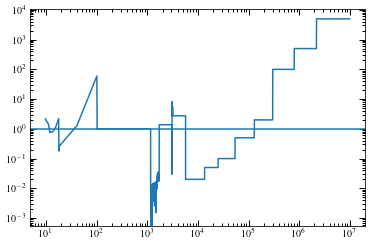

In [27]:
plt.plot(data['WAVELENGTH'][1:], np.diff(data['WAVELENGTH']))
plt.yscale('log')
plt.xscale('log')
plt.axhline(1)

(1e-19, 2.436952466244968e-11)

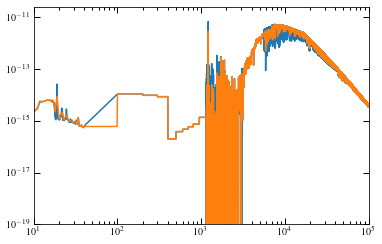

In [28]:
plt.plot(data['WAVELENGTH'], data['FLUX'])
plt.plot(data1a['WAVELENGTH'], data1a['FLUX'])
plt.yscale('log')
plt.xscale('log')
plt.xlim(10,1e5)
plt.ylim(1e-19)

In [29]:
print(np.unique(data['INSTRUMENT']))
print(np.unique(data1a['INSTRUMENT']))
print(np.unique(data['DQ']))
print(np.unique(data1a['DQ']))

INSTRUMENT
----------
        16
       256
      8192
     16384
     32768
     65536
    131072
    524288
INSTRUMENT
----------
        16
       256
      8192
     16384
     16400
     32768
     40960
     49152
     65536
     65552
    131072
    131328
    524288
    524304
    655360
   DQ  
-------
    0.0
   16.0
   32.0
   48.0
  256.0
  288.0
  500.0
  512.0
 1024.0
 1040.0
    ...
17424.0
18432.0
18448.0
18464.0
24576.0
24592.0
24608.0
26624.0
32784.0
40960.0
40992.0
Length = 34 rows
  DQ 
-----
    0
   16
   32
   48
   80
  256
  272
  288
  304
  500
  ...
36880
36896
40960
40976
40992
41008
45056
49168
49184
49200
57344
Length = 71 rows


(100.0, 120.0)

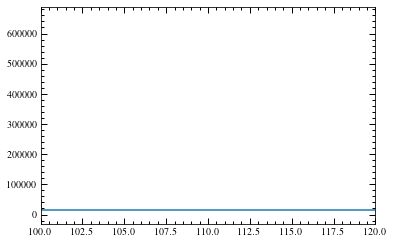

In [30]:
plt.step(data1a['WAVELENGTH'], data1a['INSTRUMENT'])
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(100, 120)
# plt.ylim(1000, 40000)

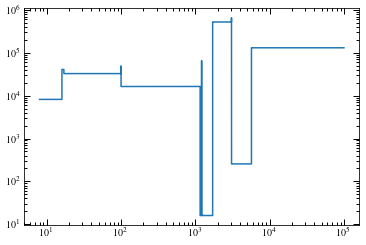

In [31]:
plt.step(data1a['WAVELENGTH'], data1a['INSTRUMENT'])
plt.xscale('log')
plt.yscale('log')

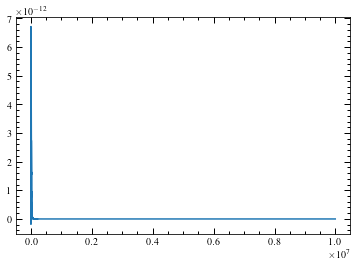

In [32]:
plt.plot(w,f)
et= 0.1*abs(f)

# wt, ft, et = resample.bintogrid(w[w > 3000] ,f[w> 3000], newx= neww, unc=et[w>3000])
# print(len(wt))
# plt.plot(wt, ft)
# plt.xscale('log')
# plt.yscale('log')

In [32]:
from specutils import Spectrum1D
from specutils.manipulation import FluxConservingResampler
from astropy.nddata import StdDevUncertainty


In [50]:
input_spec = Spectrum1D(spectral_axis=w[w< 5700]*u.AA, flux=f[w< 5700]*u.Unit('erg cm-2 s-1 AA-1') , uncertainty= StdDevUncertainty(e[w< 5700])) 

In [51]:
fluxcon = FluxConservingResampler()
new_spec_fluxcon = fluxcon(input_spec, neww[neww< 5700]*u.AA)

/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/specutils/manipulation/resample.py:204: RuntimeWarning: divide by zero encountered in reciprocal
  out_uncertainty = InverseVariance(np.reciprocal(out_variance))


In [52]:
new_spec_fluxcon.uncertainty.array

array([6.87540429e+30, 5.85674799e+30, 5.22482076e+30, ...,
                  inf,            inf,            inf])

In [ ]:
plt.step(input_spec.spectral_axis, input_spec.flux)
plt.step(new_spec_fluxcon.spectral_axis, new_spec_fluxcon.flux)
plt.step(input_spec.spectral_axis, input_spec.uncertainty.array)
plt.step(new_spec_fluxcon.spectral_axis, 1/new_spec_fluxcon.uncertainty.array**0.5)
plt.yscale('log')
plt.xlim(1400, 1410)
plt.ylim(1e-17, 1e-12)

In [ ]:
plt.plot(data['WAVELENGTH'], data['INSTRUMENT'])
plt.xscale('log')
plt.yscale('log')
plt.xlim(5500, 6000)

In [54]:
new_spec_fluxcon.spectral_axis.value

array([   8.,    9.,   10., ..., 5697., 5698., 5699.])

In [1]:
import instruments

In [2]:
instruments.getmodelcodes()

[1024, 16384, 32768, 65536, 131072, 16777216]

Thinking about rebinning onto separate grids then combining. Does craftroom work on individual COS spectra? i.e spectra with lots of zero errors.

In [3]:
path = '/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/'

In [6]:
cosspecs = glob.glob('{}*/components_v1/*cos*.fits'.format(path))


/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/2MASS-J23062928-0502285/components_v1/hlsp_muscles_hst_cos_2mass-j23062928-0502285_g130m_v6_component-spec.fits
1132.0 1428.99633
1.3101045146531203e-12


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/specutils/manipulation/resample.py:204: RuntimeWarning: divide by zero encountered in reciprocal
  out_uncertainty = InverseVariance(np.reciprocal(out_variance))


1.310083819690189e-12
-8.496515792536707e-18 7.54320957094562e-18


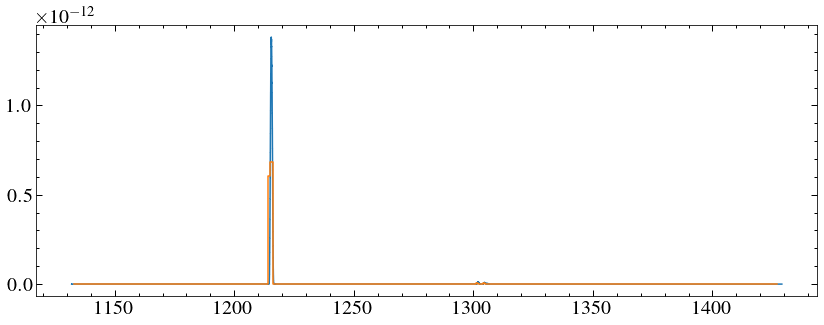

/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/2MASS-J23062928-0502285/components_v1/hlsp_muscles_hst_cos_2mass-j23062928-0502285_g160m_v6_component-spec.fits
1393.0 1781.9996099999998
-3.983416594910533e-15
-4.06307425814107e-15
-3.4549325125546715e-18 -8.766427568178601e-17


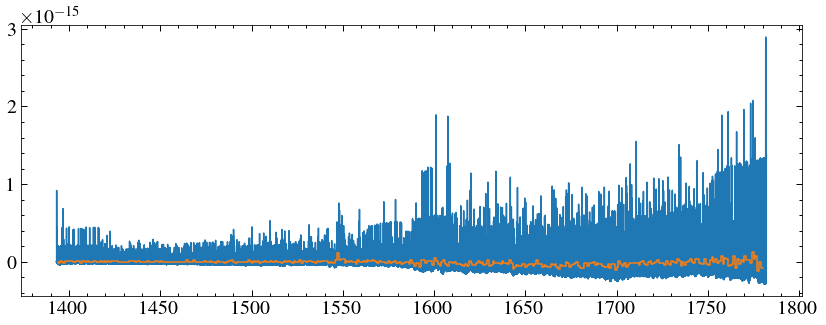

/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/2MASS-J23062928-0502285/components_v1/hlsp_muscles_hst_cos_2mass-j23062928-0502285_g230l_v6_component-spec.fits
1629.9089620850539 3215.9881728276387
1.6010935671753196e-14
1.601093148766131e-14
0.0 0.0


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/specutils/manipulation/resample.py:204: RuntimeWarning: divide by zero encountered in reciprocal
  out_uncertainty = InverseVariance(np.reciprocal(out_variance))


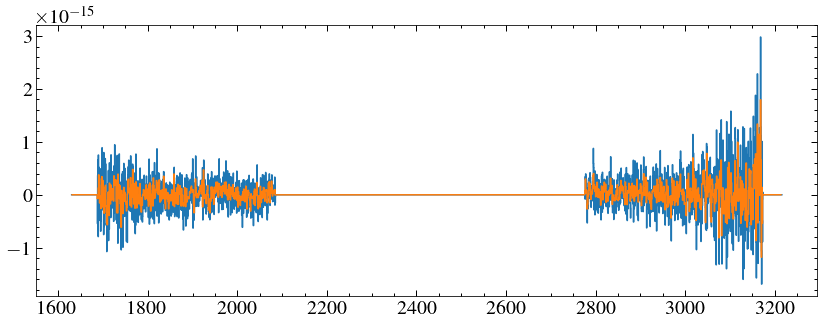

/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/GJ1132/components_v1/hlsp_muscles_hst_cos_gj1132_g130m_v1_component-spec.fits
1131.6748886229673 1786.2566686229673
6.528030263725352e-13


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/specutils/manipulation/resample.py:204: RuntimeWarning: divide by zero encountered in reciprocal
  out_uncertainty = InverseVariance(np.reciprocal(out_variance))


6.528422064432246e-13
-8.642975160079244e-18 -8.107365481514839e-17


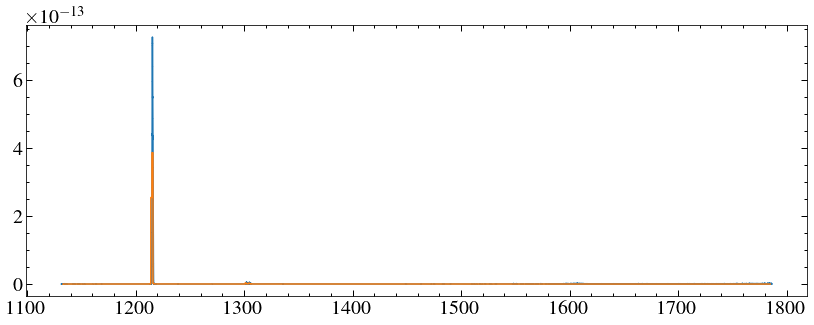

/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/GJ163/components_v1/hlsp_muscles_hst_cos_gj163_g130m_v1_component-spec.fits
1132.0 1428.99633
1.0538129701228278e-12
1.0538212260048311e-12
-1.9264346745114654e-17 -1.1666897355559719e-17


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/specutils/manipulation/resample.py:204: RuntimeWarning: divide by zero encountered in reciprocal
  out_uncertainty = InverseVariance(np.reciprocal(out_variance))


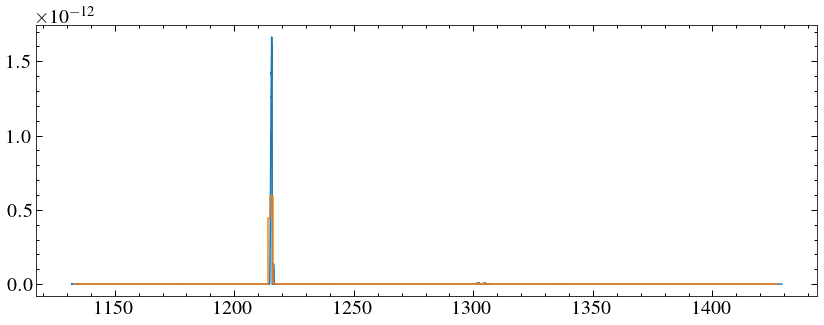

/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/GJ163/components_v1/hlsp_muscles_hst_cos_gj163_g160m_v1_component-spec.fits
1393.3856903597107 1786.3405803597107
3.9919358554984456e-16
3.5875152544223787e-16
7.117546916970557e-18 -8.027533147229712e-17


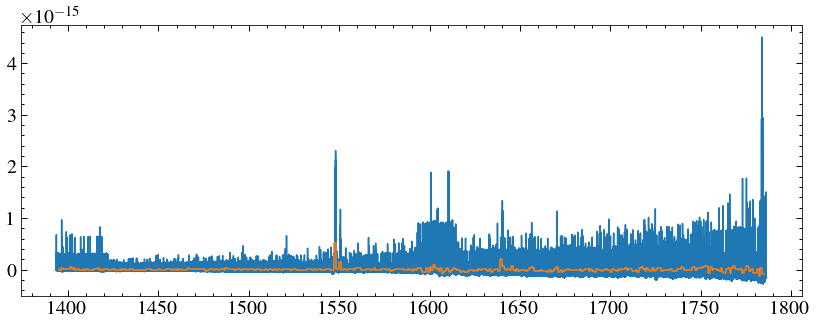

/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/GJ649/components_v1/hlsp_muscles_hst_cos_gj649_g130m_v1_component-spec.fits
1066.0 1361.99933
3.924137677016298e-14
3.9397146957824666e-14
-4.925248613563855e-16 4.40602518988253e-17


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/specutils/manipulation/resample.py:204: RuntimeWarning: divide by zero encountered in reciprocal
  out_uncertainty = InverseVariance(np.reciprocal(out_variance))


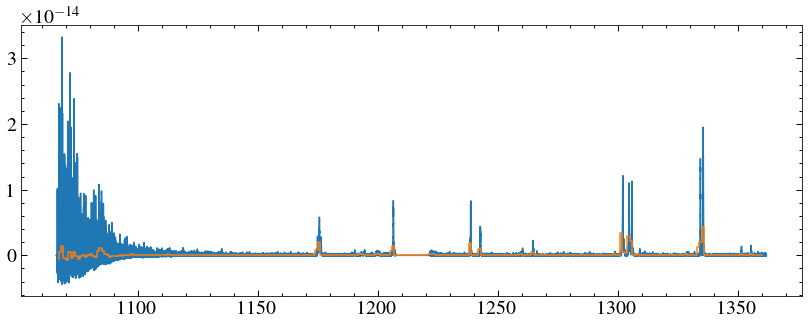

/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/GJ674/components_v1/hlsp_muscles_hst_cos_gj674_g130m_v1_component-spec.fits
1069.0 1361.99836
3.1150068216199336e-13
3.112953517114445e-13
-1.0310844923643837e-15 2.9067606990565134e-16


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/specutils/manipulation/resample.py:204: RuntimeWarning: divide by zero encountered in reciprocal
  out_uncertainty = InverseVariance(np.reciprocal(out_variance))


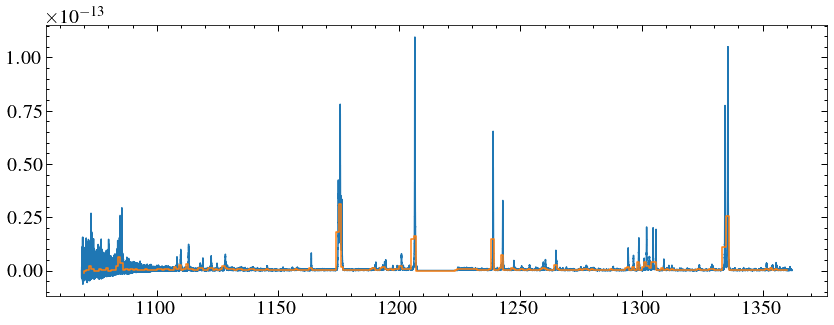

/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/GJ676A/components_v1/hlsp_muscles_hst_cos_gj676a_g130m_v1_component-spec.fits
1066.0 1361.99933
5.3228425295655636e-14
5.272664144894292e-14
-5.342648789799842e-16 7.1062597997805e-17


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/specutils/manipulation/resample.py:204: RuntimeWarning: divide by zero encountered in reciprocal
  out_uncertainty = InverseVariance(np.reciprocal(out_variance))


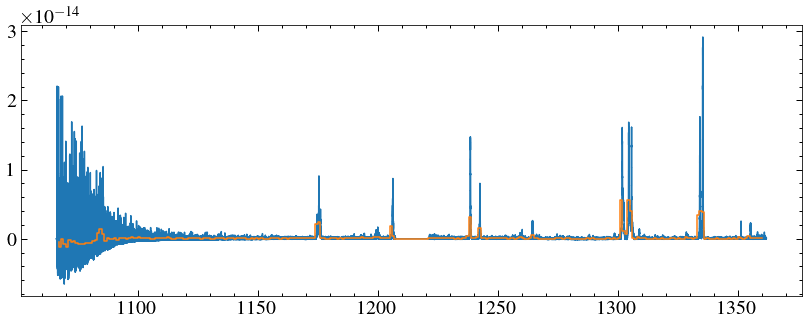

/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/GJ699/components_v1/hlsp_muscles_hst_cos_gj699_g130m_v1_component-spec.fits
1066.0 1361.99933
6.075784021844938e-14
6.035962071278247e-14
1.509024826404415e-16 5.972029578845032e-17


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/specutils/manipulation/resample.py:204: RuntimeWarning: divide by zero encountered in reciprocal
  out_uncertainty = InverseVariance(np.reciprocal(out_variance))


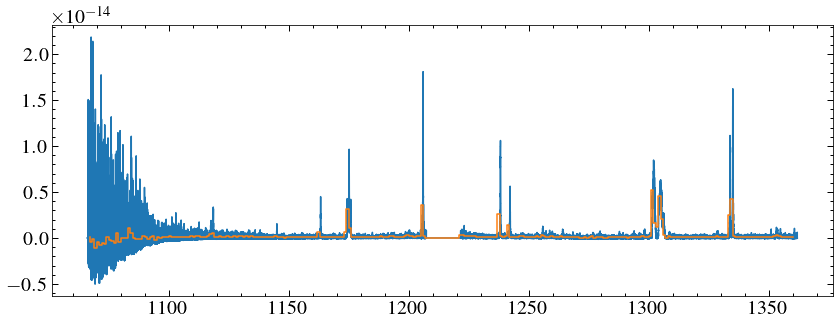

/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/GJ849/components_v1/hlsp_muscles_hst_cos_gj849_g130m_v1_component-spec.fits
1132.0 1428.99633
1.0122439227243724e-12
1.012200967955576e-12
3.350840051514485e-17 3.2780181861323066e-17


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/specutils/manipulation/resample.py:204: RuntimeWarning: divide by zero encountered in reciprocal
  out_uncertainty = InverseVariance(np.reciprocal(out_variance))


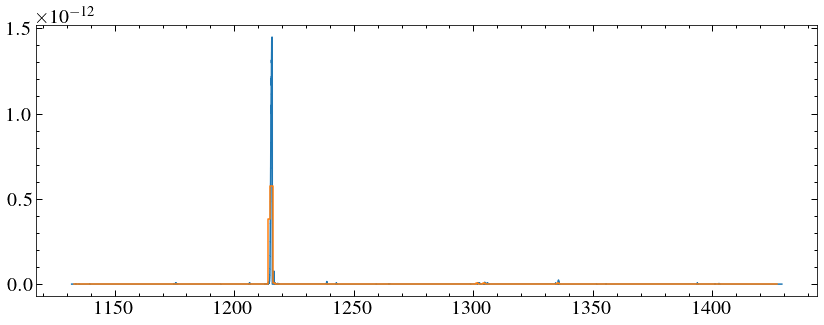

/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/GJ849/components_v1/hlsp_muscles_hst_cos_gj849_g160m_v1_component-spec.fits
1417.0 1785.99133
3.563974187269372e-14


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/specutils/manipulation/resample.py:204: RuntimeWarning: divide by zero encountered in reciprocal
  out_uncertainty = InverseVariance(np.reciprocal(out_variance))


3.530676698483666e-14
1.700576816345035e-17 1.4119901430764746e-16


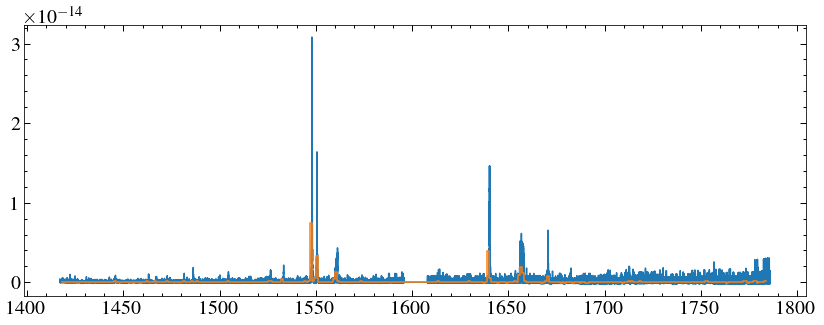

/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/L-980-5/components_v1/hlsp_muscles_hst_cos_l-980-5_g130m_v1_component-spec.fits
1132.0 1428.99633
5.503716698669795e-13
5.503501529113538e-13
6.42430632897507e-19 2.1944040236171432e-17


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/specutils/manipulation/resample.py:204: RuntimeWarning: divide by zero encountered in reciprocal
  out_uncertainty = InverseVariance(np.reciprocal(out_variance))


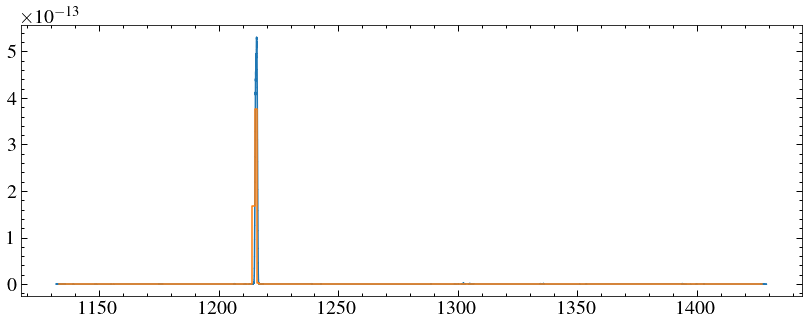

/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/L-980-5/components_v1/hlsp_muscles_hst_cos_l-980-5_g160m_v1_component-spec.fits
1339.5218782164125 1709.5280482164126
6.754453636187326e-16


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/specutils/manipulation/resample.py:204: RuntimeWarning: divide by zero encountered in reciprocal
  out_uncertainty = InverseVariance(np.reciprocal(out_variance))


5.400478619119312e-16
1.3463051970411702e-17 -4.93708860664096e-17


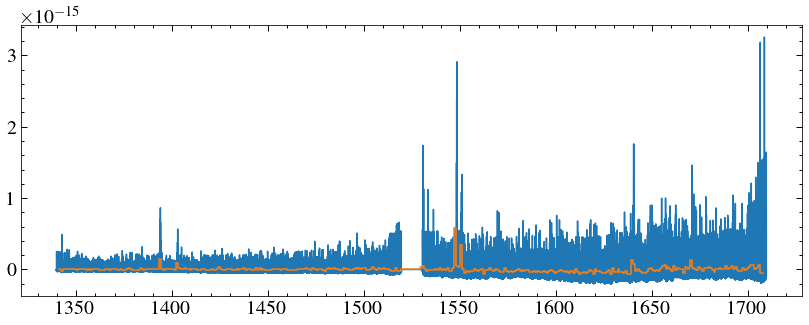

/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/LHS-2686/components_v1/hlsp_muscles_hst_cos_lhs-2686_g130m_v1_component-spec.fits
1066.0 1366.9943
3.935278364984675e-14
3.998491348785847e-14
-7.781275037282764e-16 4.997180341767232e-18


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/specutils/manipulation/resample.py:204: RuntimeWarning: divide by zero encountered in reciprocal
  out_uncertainty = InverseVariance(np.reciprocal(out_variance))


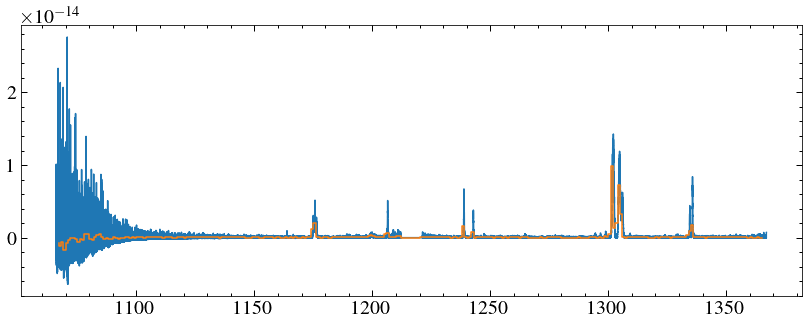

In [36]:
for x in cosspecs:
    print(x)
    data = fits.getdata(x, 1)
    w, f, e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
    print(w[0], w[-1])
    plt.step(w, f)
    print(np.trapz(f, w))
    start, end= mt.ceil(w[0]), mt.floor(w[-1])
    w1 = np.arange(start+1, end, 1) #+1 because it has issues with nans.
    input_spec = Spectrum1D(spectral_axis=w*u.AA, flux=f*u.Unit('erg cm-2 s-1 AA-1') , uncertainty= StdDevUncertainty(e))
    fluxcon = FluxConservingResampler(extrapolation_treatment='zero_fill')
    new_spec = fluxcon(input_spec, w1*u.AA,)

    plt.step(new_spec.spectral_axis, new_spec.flux, )
    print(np.trapz(new_spec.flux.value, new_spec.spectral_axis.value))
    f1 = new_spec.flux.value 
    print(f1[0], f1[-1])
# #     print(w1)
#     print(len(w1))
#     w1, f1, e1 = resample.bintogrid(w, f, newx= w1, unc=e, drop_nans=False) #doesn't work
#     print(len(w1))
#     plt.step(w1, f1)

    
    
    
    plt.show()